In [4]:
%matplotlib inline
import pandas as pd

In [5]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [6]:
python build/BUILD.py

SyntaxError: invalid syntax (<ipython-input-6-1e7f023f36a4>, line 1)

In [7]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017


In [8]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### How many movies are listed in the titles dataframe?

In [17]:
%%time
cast[cast.title == 'Sleuth']

CPU times: user 331 ms, sys: 5.79 ms, total: 337 ms
Wall time: 344 ms


,title,year,name,type,character,n
260242,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
326773,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
326774,Sleuth,2007,Michael Caine,actor,Andrew,1.0
373876,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
373877,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1293634,Sleuth,2007,Jude Law,actor,Milo,2.0
1448690,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1465483,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1705394,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1805907,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [21]:
c = cast.set_index(['title'])
c.head()

,year,name,type,character,n
title,,,,,
Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
Suuri illusioni,1985,Homo $,actor,Guests,22.0
Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [22]:
%%time
c.loc['Sleuth']


CPU times: user 1.63 s, sys: 61.4 ms, total: 1.69 s
Wall time: 1.9 s


,year,name,type,character,n
title,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
Sleuth,2007,Michael Caine,actor,Andrew,1.0
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,2007,Jude Law,actor,Milo,2.0
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0


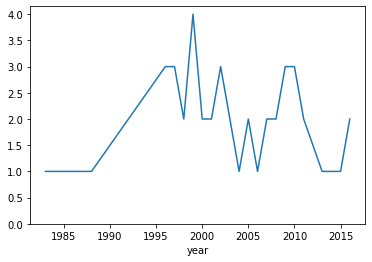

In [29]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby('year').size().plot(ylim=0)

In [31]:
c = cast
c.groupby([c.year // 10 * 10, 'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       27605
      actress     15830
1920  actor       48726
      actress     24075
1930  actor      151290
      actress     49972
1940  actor      162364
      actress     51795
1950  actor      157738
      actress     57733
1960  actor      134605
      actress     57744
1970  actor      152811
      actress     66974
1980  actor      197530
      actress     91509
1990  actor      263000
      actress    125040
2000  actor      489468
      actress    263941
2010  actor      747346
      actress    448737
2020  actor         140
      actress       127
2110  actor           2
      actress         1
dtype: int64

In [47]:
c = cast
c = c[(c.character == 'Kermit the Frog')
     | (c.character == 'Oscar the Grouch')]

g = c.groupby(['character', c.year // 10 * 10]).size()
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [43]:
u = g.unstack()
u

year,1970,1980,1990,2000,2010
character,,,,,
Kermit the Frog,1.0,4.0,2.0,1.0,1.0
Oscar the Grouch,NaN,2.0,1.0,1.0,NaN


In [49]:
u = g.unstack().fillna(0)
u

year,1970,1980,1990,2000,2010
character,,,,,
Kermit the Frog,1.0,4.0,2.0,1.0,1.0
Oscar the Grouch,0.0,2.0,1.0,1.0,0.0


In [45]:
u.stack()

character         year
Kermit the Frog   1970    1.0
                  1980    4.0
                  1990    2.0
                  2000    1.0
                  2010    1.0
Oscar the Grouch  1980    2.0
                  1990    1.0
                  2000    1.0
dtype: float64

### What are the earliest two films listed in the titles dataframe?

### How many movies have the title "Hamlet"?

### How many movies are titled "North by Northwest"?

### When was the first movie titled "Hamlet" made?

### List all of the "Treasure Island" movies from earliest to most recent.

### How many movies were made in the year 1950?

### How many movies were made in the year 1960?

### How many movies were made from 1950 through 1959?

### In what years has a movie titled "Batman" been released?

### How many roles were there in the movie "Inception"?

### How many roles in the movie "Inception" are NOT ranked by an "n" value?

### But how many roles in the movie "Inception" did receive an "n" value?

### Display the cast of "North by Northwest" in their correct "n"-value order, ignoring roles that did not earn a numeric "n" value.

### Display the entire cast, in "n"-order, of the 1972 film "Sleuth".

### Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".

### How many roles were credited in the silent 1921 version of Hamlet?

### How many roles were credited in Branagh’s 1996 Hamlet?

### How many "Hamlet" roles have been listed in all film credits through history?

### How many people have played an "Ophelia"?

### How many people have played a role called "The Dude"?

### How many people have played a role called "The Stranger"?

### How many roles has Sidney Poitier played throughout his career?

### How many roles has Judi Dench played?

### List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year.

### List the leading roles that Cary Grant played in the 1940s in order by year.

### How many roles were available for actors in the 1950s?

### How many roles were available for actresses in the 1950s?

### How many leading roles (n=1) were available from the beginning of film history through 1980?

### How many non-leading roles were available through from the beginning of film history through 1980?

### How many roles through 1980 were minor enough that they did not warrant a numeric "n" rank?